# Correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

import pinkfish as pf

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
symbols = ['SPY', 'GLD', 'BOND', 'EEM', 'IYR',
           'JNK', 'LQD', 'NLY',  'PFF', 'PGX',
           'SLY', 'TIP', 'TLT',  'BSV', 'VNQ']
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
# fetch timeseries
portfolio = pf.Portfolio()
ts = portfolio.fetch_timeseries(symbols, start, end, fields=['close'])

In [5]:
ts, start = portfolio.finalize_timeseries(ts, start)

,SPY,GLD,BOND,EEM,IYR,JNK,LQD,NLY,PFF,PGX,SLY,TIP,TLT,BSV,VNQ
SPY,1.00,-0.18,0.95,0.64,0.95,0.96,0.93,0.71,0.96,0.97,0.95,0.68,0.77,0.89,0.93
GLD,-0.18,1.00,-0.06,0.10,-0.19,-0.15,0.05,0.03,-0.25,-0.18,-0.35,0.51,0.16,0.10,-0.25
BOND,0.95,-0.06,1.00,0.51,0.94,0.91,0.99,0.64,0.94,0.97,0.83,0.80,0.90,0.97,0.93
EEM,0.64,0.10,0.51,1.00,0.55,0.74,0.52,0.69,0.56,0.54,0.68,0.47,0.27,0.42,0.50
IYR,0.95,-0.19,0.94,0.55,1.00,0.93,0.93,0.75,0.98,0.97,0.91,0.68,0.78,0.87,0.99
JNK,0.96,-0.15,0.91,0.74,0.93,1.00,0.89,0.73,0.92,0.91,0.93,0.67,0.68,0.83,0.90
LQD,0.93,0.05,0.99,0.52,0.93,0.89,1.00,0.64,0.92,0.95,0.79,0.85,0.92,0.98,0.91
NLY,0.71,0.03,0.64,0.69,0.75,0.73,0.64,1.00,0.75,0.75,0.76,0.56,0.46,0.55,0.72
PFF,0.96,-0.25,0.94,0.56,0.98,0.92,0.92,0.75,1.00,0.99,0.93,0.64,0.77,0.85,0.98
PGX,0.97,-0.18,0.97,0.54,0.97,0.91,0.95,0.75,0.99,1.00,0.91,0.71,0.83,0.90,0.97


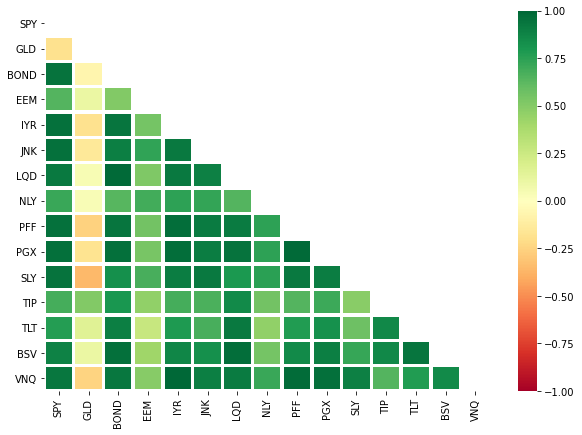

In [6]:
corr_df = portfolio.correlation_map(ts)
corr_df